In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random

## Q3

In [72]:
def generate_data(n, j , sigma, beta_coeffs,):
    X = np.random.normal(0, 1, n)
    y = np.zeros(n)
    X = np.array([X**(i+1) for i in range(j)]).T
    y = np.matmul(X,beta_coeffs) 
    y = y + np.random.normal(0, sigma, n)
    return X,y


def calculate_mses_and_optimal_p(p_range, j, sigma, beta_coeffs, iterations=1000):
    train_mses = np.zeros((len(p_range),))
    test_mses = np.zeros((len(p_range),))
    
    for iteration in range(iterations):
        X, y = generate_data(n, j, sigma, beta_coeffs)
        train_size = int(0.7 * len(X)) 
        X_train, y_train = X[:train_size], y[:train_size]
        X_test, y_test = X[train_size:], y[train_size:]
        
        for p_idx, p in enumerate(p_range):
            X_train_p = X_train[:, :p]
            X_test_p = X_test[:, :p]
            model = LinearRegression().fit(X_train_p, y_train)
            y_train_pred = model.predict(X_train_p)
            y_test_pred = model.predict(X_test_p)
            
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            
            train_mses[p_idx] += train_mse
            test_mses[p_idx] += test_mse
    
    train_mses /= iterations
    test_mses /= iterations
    
    optimal_p_train = np.argmin(train_mses) + 1
    optimal_p_test = np.argmin(test_mses) + 1
    
    return train_mses, test_mses, optimal_p_train, optimal_p_test


In [73]:
n = 20
max_p = 25
j = 25
sigmas = [0.05, 0.3, 0.5, 0.8, 1]
beta_coeffs = np.array([(0.5 + 0.5 * (i + 1) / 25) for i in range(j)])
p_range = range(1, max_p + 1)

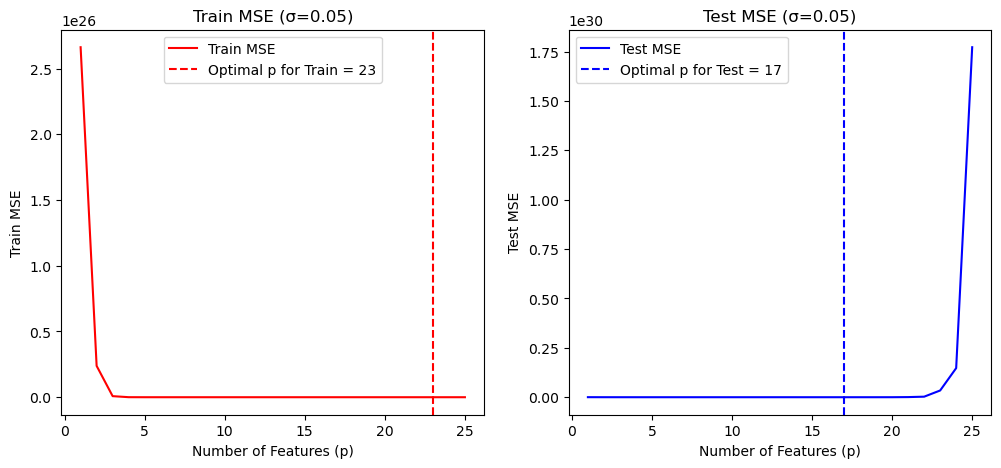

The estimated Train MSE with σ=0.05: [2.66183501e+26 2.38334699e+25 8.14729695e+23 3.15380564e+22
 1.58300847e+21 5.56067159e+19 5.39516578e+17 1.99006548e+16
 5.76443833e+14 8.64372722e+12 1.54837579e+11 1.04177763e+08
 1.93361154e-03 1.95992008e-04 5.88338336e-04 3.21383326e-04
 1.11500412e-04 2.88084988e-04 5.96963147e-02 2.54980937e-03
 6.56851170e-04 4.13565361e-04 5.67360385e-05 6.72321894e-05
 2.21619899e-04]
Optimal p for Train MSE with σ=0.05: 23
The estimated Test MSE with σ=0.05: [2.61416604e+26 1.17879209e+26 4.90037564e+25 3.37746668e+25
 3.06047473e+25 3.04257593e+25 2.94533479e+25 3.06300646e+25
 2.92987673e+25 3.11691636e+25 2.87389931e+25 3.54308830e+25
 5.04296297e+25 3.58226049e+25 2.84335463e+25 3.31678978e+25
 2.49296720e+25 3.55756227e+25 3.48349253e+25 8.65950840e+25
 6.87110445e+26 2.77879350e+27 3.41433676e+28 1.47450616e+29
 1.77218447e+30]
Optimal p for Test MSE with σ=0.05: 17


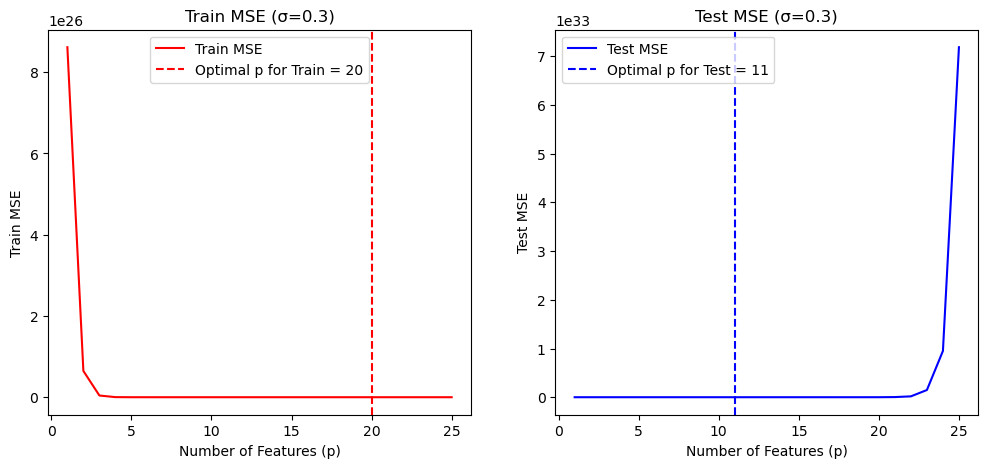

The estimated Train MSE with σ=0.3: [8.61392272e+26 6.46570608e+25 4.22420078e+24 2.40984560e+23
 1.62870785e+22 1.03387399e+21 3.64666137e+19 8.54022683e+17
 5.86001044e+16 1.15068697e+15 8.38209296e+11 1.96504047e+09
 1.48629628e-02 1.10844281e-02 2.54931558e-03 6.62005854e-04
 1.94739409e-03 1.02931310e-02 2.75540456e-03 6.53634547e-04
 4.94888580e-02 3.20557062e-03 1.86616113e-03 8.72565482e-04
 1.42492644e-03]
Optimal p for Train MSE with σ=0.3: 20
The estimated Test MSE with σ=0.3: [1.10541295e+27 1.65866900e+26 2.62434792e+25 1.02616089e+25
 8.80580926e+24 8.55488541e+24 8.51811667e+24 8.51065716e+24
 8.50696975e+24 8.50463613e+24 8.50333918e+24 8.50349921e+24
 1.06354907e+25 9.86933958e+24 2.96290468e+25 7.27994158e+25
 1.07502659e+27 4.74857072e+27 5.75503962e+28 3.09774665e+29
 2.96999899e+30 1.79213331e+31 1.48044254e+32 9.50154725e+32
 7.18489486e+33]
Optimal p for Test MSE with σ=0.3: 11


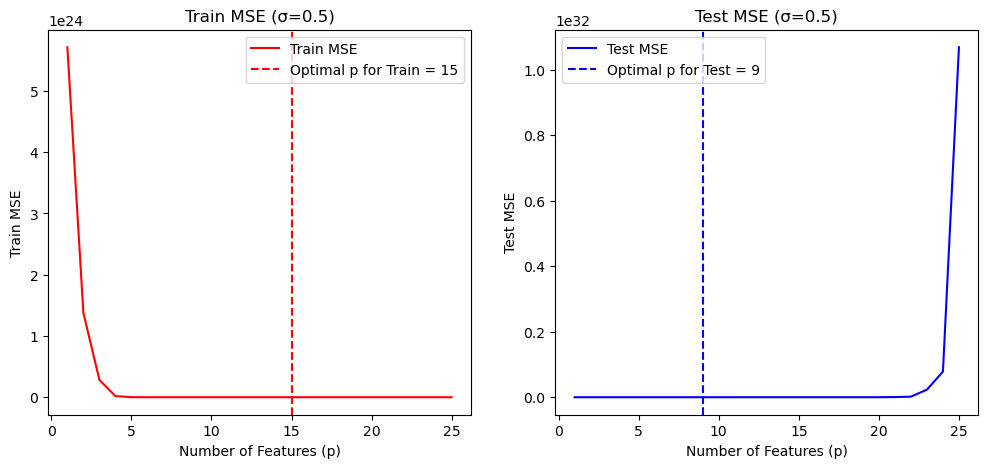

The estimated Train MSE with σ=0.5: [5.71427723e+24 1.37732402e+24 2.83882379e+23 1.87841102e+22
 9.56923308e+20 3.24573499e+19 7.24196010e+17 1.17205626e+16
 4.03763667e+14 1.09970910e+13 1.59690693e+11 1.09188656e+09
 2.12666075e-04 3.63748744e-05 1.28004536e-05 2.12114433e-04
 2.21051994e-04 3.19328789e-04 4.04903791e-04 4.62691462e-04
 9.62084267e-04 1.22852109e-03 4.72798186e-03 2.65857904e-03
 3.26323611e-03]
Optimal p for Train MSE with σ=0.5: 15
The estimated Test MSE with σ=0.5: [3.29182094e+24 2.43199124e+24 1.34989406e+24 1.05687578e+24
 9.21141404e+23 9.49207496e+23 7.80760823e+23 1.42488904e+24
 6.14052030e+22 1.04860301e+25 1.54639866e+25 2.26033499e+26
 1.75452881e+27 1.11346051e+27 7.32750178e+26 6.96778427e+26
 5.57030943e+26 6.66670230e+26 1.49318954e+27 4.11617822e+27
 4.82506117e+28 1.69994592e+29 2.30929270e+30 7.81077964e+30
 1.06827498e+32]
Optimal p for Test MSE with σ=0.5: 9


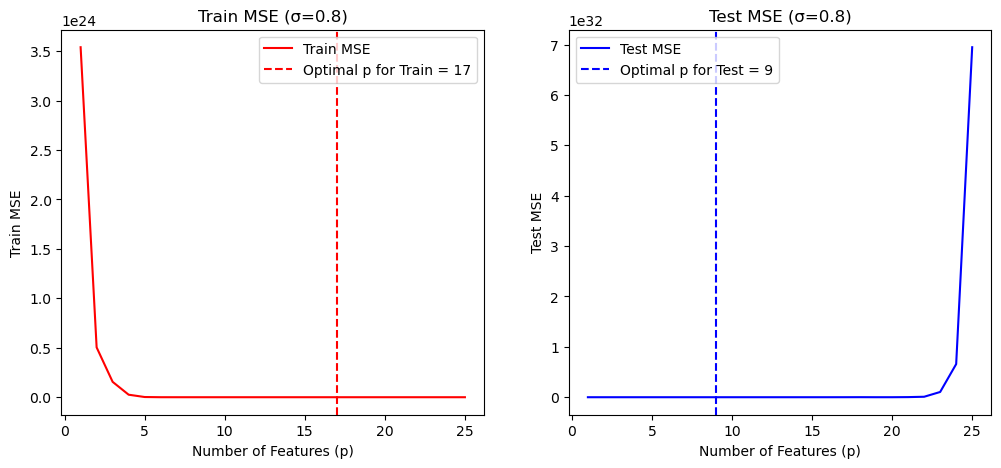

The estimated Train MSE with σ=0.8: [3.53934723e+24 5.03774448e+23 1.55353372e+23 2.54042472e+22
 2.03216518e+21 1.10401965e+20 3.39780704e+18 3.10531432e+17
 1.37971045e+16 2.30281268e+14 4.00721884e+12 1.92669424e+09
 6.82710482e-04 3.22221681e-04 3.75549884e-04 1.96058643e-03
 2.48426043e-04 7.25473331e-03 1.17769268e-03 8.80710223e-04
 1.58854686e-03 2.51537971e-03 3.97305189e-03 5.61829337e-03
 8.23018403e-03]
Optimal p for Train MSE with σ=0.8: 17
The estimated Test MSE with σ=0.8: [8.11897945e+24 3.00300261e+24 1.56949146e+24 1.25333400e+24
 1.19842188e+24 1.18717546e+24 1.17232985e+24 1.19408508e+24
 1.15083797e+24 1.48229756e+24 1.58721157e+24 6.36019542e+24
 3.71605786e+25 3.61469218e+25 4.44166095e+26 1.23741250e+27
 3.30714944e+28 9.53842116e+28 7.32890694e+27 2.03694913e+28
 2.23487018e+29 9.30918287e+29 1.04168698e+31 6.58057108e+31
 6.94845036e+32]
Optimal p for Test MSE with σ=0.8: 9


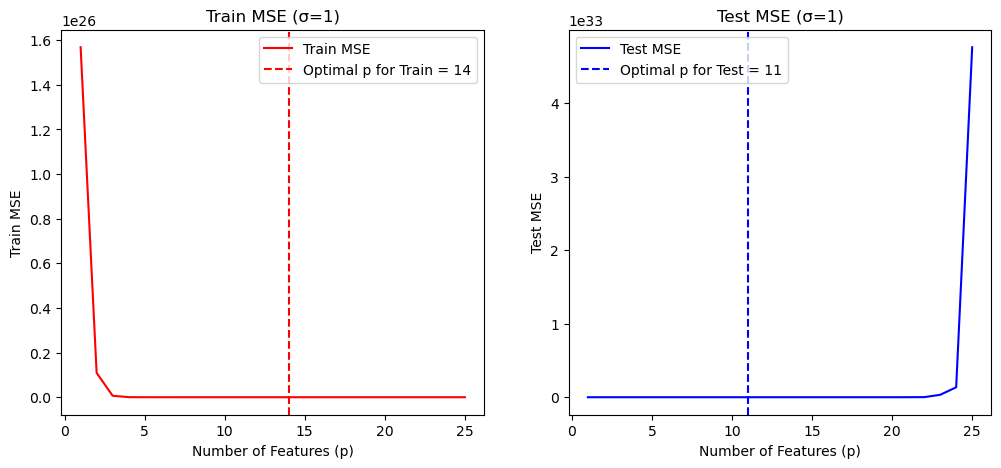

The estimated Train MSE with σ=1: [1.56840147e+26 1.09077708e+25 6.55949497e+23 3.54923431e+22
 2.19091233e+21 1.62647161e+20 2.47855850e+18 2.61378856e+16
 1.19456320e+15 1.03037318e+14 3.45525267e+12 7.45017588e+10
 3.15801598e-03 4.62283143e-04 7.93205410e-02 3.67641456e-03
 7.64220578e-04 1.59821307e-03 2.22374099e-03 2.10488657e-03
 2.76587937e-03 4.55647066e-03 5.89190144e-03 8.68150355e-03
 1.21467267e-02]
Optimal p for Train MSE with σ=1: 14
The estimated Test MSE with σ=1: [4.26139081e+26 2.88029220e+26 2.49358502e+26 2.45051399e+26
 2.43958087e+26 2.43796220e+26 2.43755204e+26 2.43760811e+26
 2.43740109e+26 2.43779947e+26 2.43693686e+26 2.43906744e+26
 2.48815087e+26 2.45413360e+26 2.74811300e+26 2.61329021e+26
 6.04208655e+26 7.10557647e+26 7.49421074e+27 1.99610720e+28
 3.42698012e+29 1.20481676e+30 3.27075728e+31 1.35267698e+32
 4.75746688e+33]
Optimal p for Test MSE with σ=1: 11


In [75]:
for sigma in sigmas:
    X, y = generate_data(n, j, sigma, beta_coeffs)
    train_mses, test_mses, optimal_p_train, optimal_p_test = calculate_mses_and_optimal_p(p_range, j, sigma, beta_coeffs, iterations=1000)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].plot(p_range, train_mses, label='Train MSE', color='r')
    ax[0].axvline(x=optimal_p_train, color='r', linestyle='--', 
                  label=f'Optimal p for Train = {optimal_p_train}')
    ax[0].set_xlabel('Number of Features (p)')
    ax[0].set_ylabel('Train MSE')
    ax[0].set_title(f'Train MSE (σ={sigma})')
    ax[0].legend()

    ax[1].plot(p_range, test_mses, label='Test MSE', color='b')
    ax[1].axvline(x=optimal_p_test, color='b', linestyle='--', 
                  label=f'Optimal p for Test = {optimal_p_test}')
    ax[1].set_xlabel('Number of Features (p)')
    ax[1].set_ylabel('Test MSE')
    ax[1].set_title(f'Test MSE (σ={sigma})')
    ax[1].legend()
    plt.show()
    
    print(f"The estimated Train MSE with σ={sigma}: {train_mses}")
    print(f"Optimal p for Train MSE with σ={sigma}: {optimal_p_train}")

    print(f"The estimated Test MSE with σ={sigma}: {test_mses}")
    print(f"Optimal p for Test MSE with σ={sigma}: {optimal_p_test}")

For the Train MSE curve, the curve exbits a U-shape, which means with the increcement of p, the model fits better. 

But for the Test MSE curve, the curve initially decreasing and then increasing, indicaing the overfitting for large p.

The discrepancy between the optimal p for training and testing suggests that some features are capturing noise, which benefits the training MSE but harms the test MSE.

## Q4

In [55]:
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import pandas as pd

In [61]:
def generate_data(n, seed):
    np.random.seed(seed)
    x = np.random.normal(0, 1, n)
    e = np.random.normal(0, 1, n)
    y = x - 2*(x**2) + e
    return x, y
   
def loocv_errors(x, y):
    loocv = LeaveOneOut()
    models_mse = {}
    degrees = [1, 2, 3, 4]
    labels = ['Linear', 'Quadratic', 'Cubic', 'Quartic']
    
    for degree, label in zip(degrees, labels):
        model_mse = []
        for train_index, test_index in loocv.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            poly = PolynomialFeatures(degree)
            X_train_poly = poly.fit_transform(X_train[:, np.newaxis])
            X_test_poly = poly.transform(X_test[:, np.newaxis])
            
            model = LinearRegression().fit(X_train_poly, y_train)
            
            y_pred = model.predict(X_test_poly)
            mse = mean_squared_error(y_test, y_pred)
            model_mse.append(mse)
        
        models_mse[label] = np.mean(model_mse)
    
    return models_mse

In [62]:
# (a)
x, y = generate_data(100, seed=0)
loocv_mse_a = loocv_errors(x, y)
loocv_mse_a

{'Linear': 8.888205832586202,
 'Quadratic': 1.1161531889772691,
 'Cubic': 1.1622258803903236,
 'Quartic': 1.147147943009141}

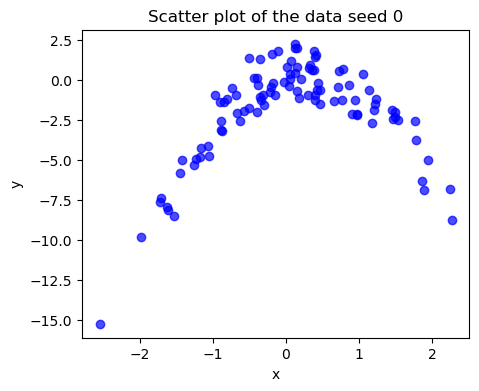

In [63]:
plt.figure(figsize=(5, 4))
plt.scatter(x, y, alpha=0.7, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the data seed 0')
plt.show()

In [64]:
# (b)
x_1, y_1 = generate_data(100, seed=1)
loocv_mse_b = loocv_errors(x_1, y_1)
loocv_mse_b

{'Linear': 6.260764331604616,
 'Quadratic': 0.9142897072803662,
 'Cubic': 0.9268768781648798,
 'Quartic': 0.8669116865881086}

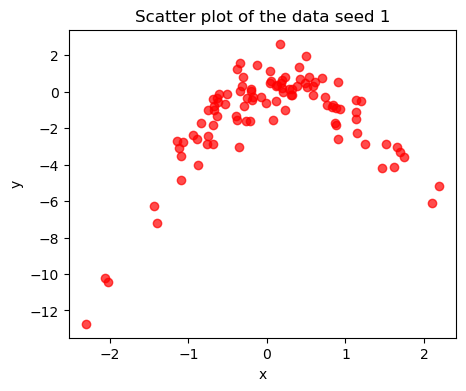

In [65]:
plt.figure(figsize=(5, 4))
plt.scatter(x_1, y_1, alpha=0.7, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the data seed 1')
plt.show()

The result for seed 1 is different fron that of seed 0.

In [66]:
# (c)
loocv_mse_a

{'Linear': 8.888205832586202,
 'Quadratic': 1.1161531889772691,
 'Cubic': 1.1622258803903236,
 'Quartic': 1.147147943009141}

The quadratic model had the smallest error for seed 1, which is consistent with the expected outcome since the data was generated with a quadratic relationship.

In [10]:
# (d)
def fit_polynomial_model(x, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    model = sm.OLS(y, X_poly).fit()
    return model.summary()

def compare_model_summaries(n, degrees, seeds):
    summaries = {}
    for seed in seeds:
        x, y = generate_data(n, seed)
        summaries[seed] = {}
        for degree in degrees:
            summary = fit_polynomial_model(x, y, degree)
            df_summary = pd.DataFrame(summary.tables[1].data)
            df_summary.columns = df_summary.iloc[0]
            df_summary = df_summary.drop(0)
            summaries[seed][f'Model degree {degree}'] = df_summary.iloc[:, :5]
            
    return summaries

In [11]:
n = 100
degrees = [1, 2, 3, 4]
seeds = [0]

model_summaries = compare_model_summaries(n, degrees, seeds)

for seed in seeds:
    print(f"Results for seed {seed}:")
    for degree in degrees:
        print(f"\nPolynomial degree {degree}:")
        print(model_summaries[seed][f'Model degree {degree}'])
    print("\n" + "#" * 80 + "\n")

Results for seed 0:

Polynomial degree 1:
0               coef    std err          t   P>|t|
1  const     -1.9487      0.290     -6.726   0.000
2     x1      0.8650      0.287      3.015   0.003

Polynomial degree 2:
0               coef    std err          t   P>|t|
1  const      0.1427      0.132      1.079   0.283
2     x1      1.1230      0.104     10.829   0.000
3     x2     -2.0668      0.080    -25.700   0.000

Polynomial degree 3:
0               coef    std err          t   P>|t|
1  const      0.1432      0.133      1.077   0.284
2     x1      1.1626      0.195      5.975   0.000
3     x2     -2.0668      0.081    -25.575   0.000
4     x3     -0.0148      0.061     -0.240   0.810

Polynomial degree 4:
0               coef    std err          t   P>|t|
1  const      0.2399      0.153      1.563   0.121
2     x1      1.1207      0.197      5.691   0.000
3     x2     -2.3116      0.212    -10.903   0.000
4     x3      0.0049      0.063      0.078   0.938
5     x4      0.0556     

For the linear model (degree 1), both coefficients are significant, but this model is too simple to capture the true relationship since it does not include the x^2 term which is known to be in the true model.

For the quadratic model (degree 2), which is the true model, both the linear and quadratic terms are significant and the constant term is not, which is consistent with the data generation process (the true model has no constant term and includes both x and x^2 terms).

For the cubic (degree 3) and quartic (degree 4) models, the coefficients for the higher-degree terms (x^3 and x^4) are not significant, which suggests that these additional terms do not provide a better explanation of the data than the quadratic term alone. This is also supported by the LOOCV results if the quadratic model indeed had the smallest LOOCV error, as it suggests that adding complexity beyond the true model does not improve out-of-sample predictive performance.